In [6]:
import cv2
import mediapipe as mp
from IPython.display import display, clear_output
import time
from IPython.display import Image


In [7]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

hands = mp_hands.Hands(
    max_num_hands=1,
    min_detection_confidence=0.7,
    min_tracking_confidence=0.5
)

cap = cv2.VideoCapture(0)


In [8]:
def detect_gesture(landmarks):
    if not landmarks:
        return ""
    
    thumb_tip = landmarks[4]
    index_tip = landmarks[8]
    middle_tip = landmarks[12]

    if index_tip.y < middle_tip.y < thumb_tip.y:
        return "Play"
    elif thumb_tip.y < index_tip.y and thumb_tip.y < middle_tip.y:
        return "Pause"
    else:
        return ""


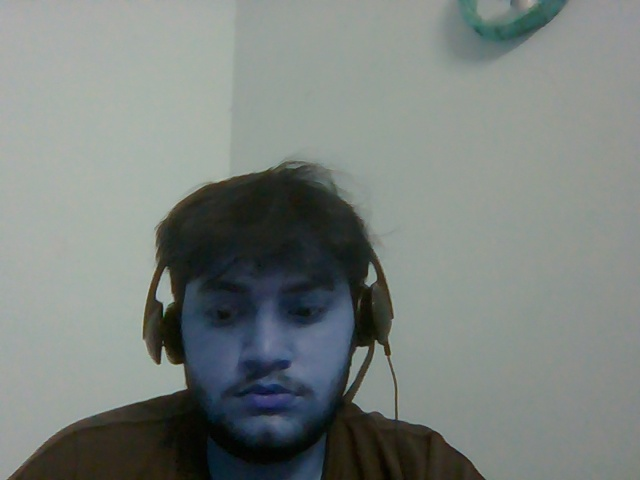

In [ ]:
try:
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        frame = cv2.flip(frame, 1)
        rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        result = hands.process(rgb)

        label = ""
        if result.multi_hand_landmarks:
            for hand_landmarks in result.multi_hand_landmarks:
                mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)
                label = detect_gesture(hand_landmarks.landmark)
                cv2.putText(frame, f"Gesture: {label}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)

        
        clear_output(wait=True)
        display_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        display(Image(data=cv2.imencode('.jpg', display_frame)[1].tobytes()))
        
        time.sleep(0.05)  

except KeyboardInterrupt:
    cap.release()
    print("start.")
